In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("d:\\ml_data\\car-mpg.csv")  

# drop the car name column as it is useless for the model
car_name = mpg_df['car_name']
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')  


In [6]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = mpg_df[mpg_df.columns[1:-1]]
y = mpg_df["mpg"]



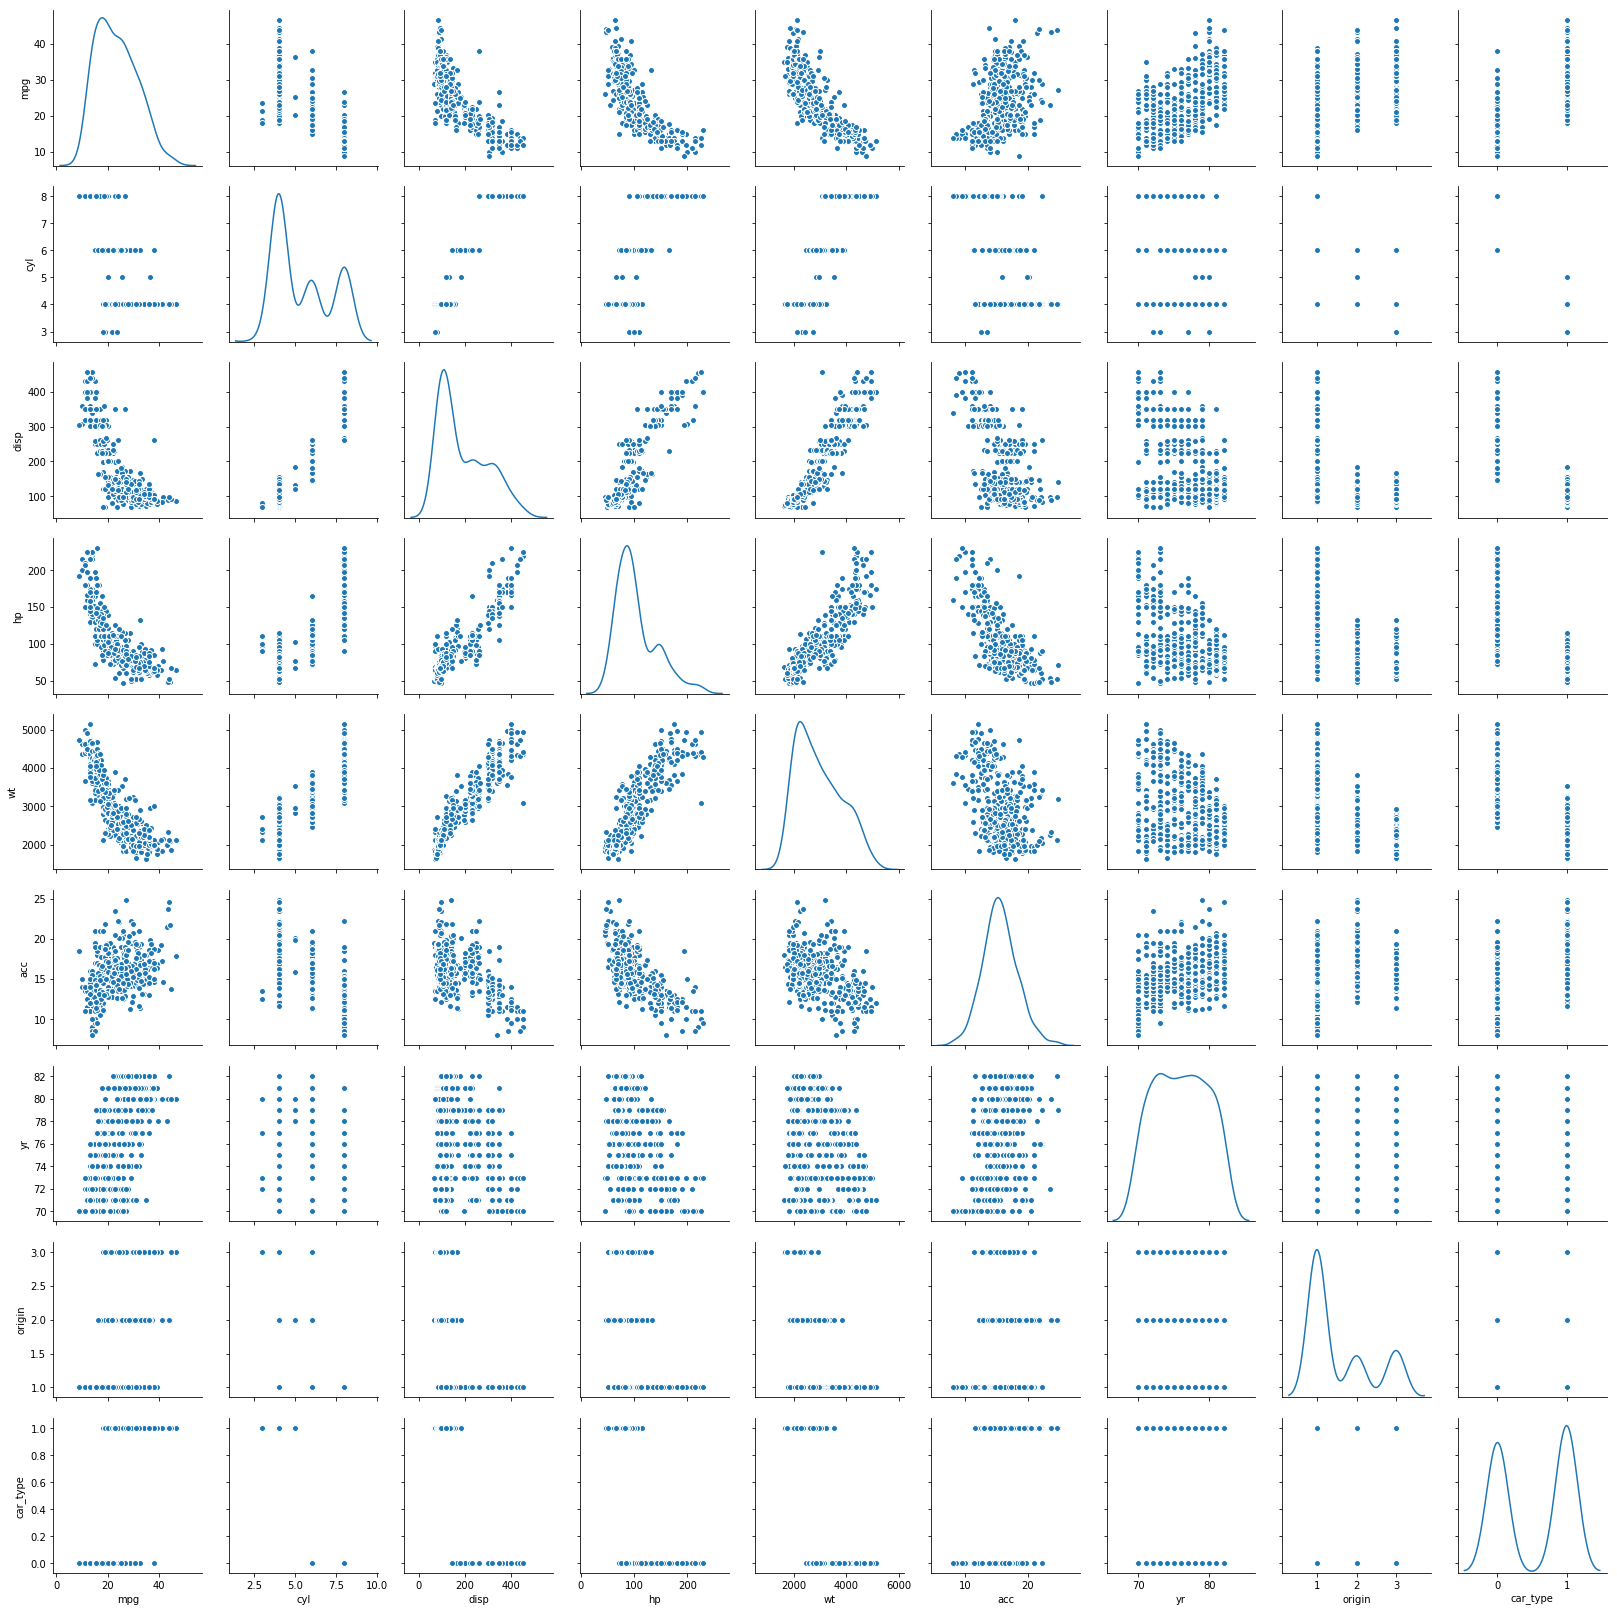

In [4]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(mpg_df, diag_kind='kde') 

In [7]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425
  -0.56396033]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656
  -0.61094444]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495
  -0.45323458]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654
  -0.58248745]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274
   0.20639158]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889
   0.18111726]
 [-0.56396033 -0.61094444 -0.45323458 -0.58248745  0.20639158  0.18111726
   1.00251889]]


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.43855264  0.1144845  -0.02689113 -0.2430079  -0.69425676 -0.45266412
  -0.21884163]
 [ 0.45386128  0.10580212 -0.02465943 -0.16082161 -0.17706048  0.84999716
  -0.0499858 ]
 [ 0.43755724 -0.14144964 -0.17639693 -0.11774532  0.5934737  -0.15543464
  -0.6059578 ]
 [ 0.43219091  0.20336634  0.00434321 -0.33489636  0.33523145 -0.20773606
   0.71003121]
 [-0.29772584  0.48640295  0.54872031 -0.53485615  0.12655828  0.02384225
  -0.26649758]
 [-0.21488225  0.63315133 -0.73994607 -0.02603235  0.02044359  0.00996896
  -0.06503704]
 [-0.29769303 -0.52617954 -0.34484761 -0.70874202 -0.07504026  0.06795576
   0.05504373]]

 Eigen Values 
%s [4.61375285 0.94263114 0.75056808 0.48239402 0.13258963 0.0336822
 0.06201432]


In [9]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.6137528470520435, array([ 0.43855264,  0.45386128,  0.43755724,  0.43219091, -0.29772584,
       -0.21488225, -0.29769303])), (0.9426311428862392, array([ 0.1144845 ,  0.10580212, -0.14144964,  0.20336634,  0.48640295,
        0.63315133, -0.52617954])), (0.750568076198404, array([-0.02689113, -0.02465943, -0.17639693,  0.00434321,  0.54872031,
       -0.73994607, -0.34484761])), (0.4823940178801025, array([-0.2430079 , -0.16082161, -0.11774532, -0.33489636, -0.53485615,
       -0.02603235, -0.70874202])), (0.13258963399280846, array([-0.69425676, -0.17706048,  0.5934737 ,  0.33523145,  0.12655828,
        0.02044359, -0.07504026])), (0.062014322700879775, array([-0.21884163, -0.0499858 , -0.6059578 ,  0.71003121, -0.26649758,
       -0.06503704,  0.05504373])), (0.03368220110313556, array([-0.45266412,  0.84999716, -0.15543464, -0.20773606,  0.02384225,
        0.00996896,  0.06795576]))]
Eigenvalues in descending order: 
[4.6137528470520435, 0.9426311428862392, 0.750568076198404,

In [10]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




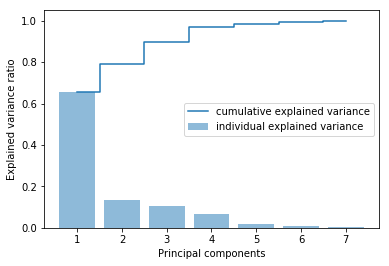

In [11]:
plt.bar(range(1,8), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [23]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [24]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

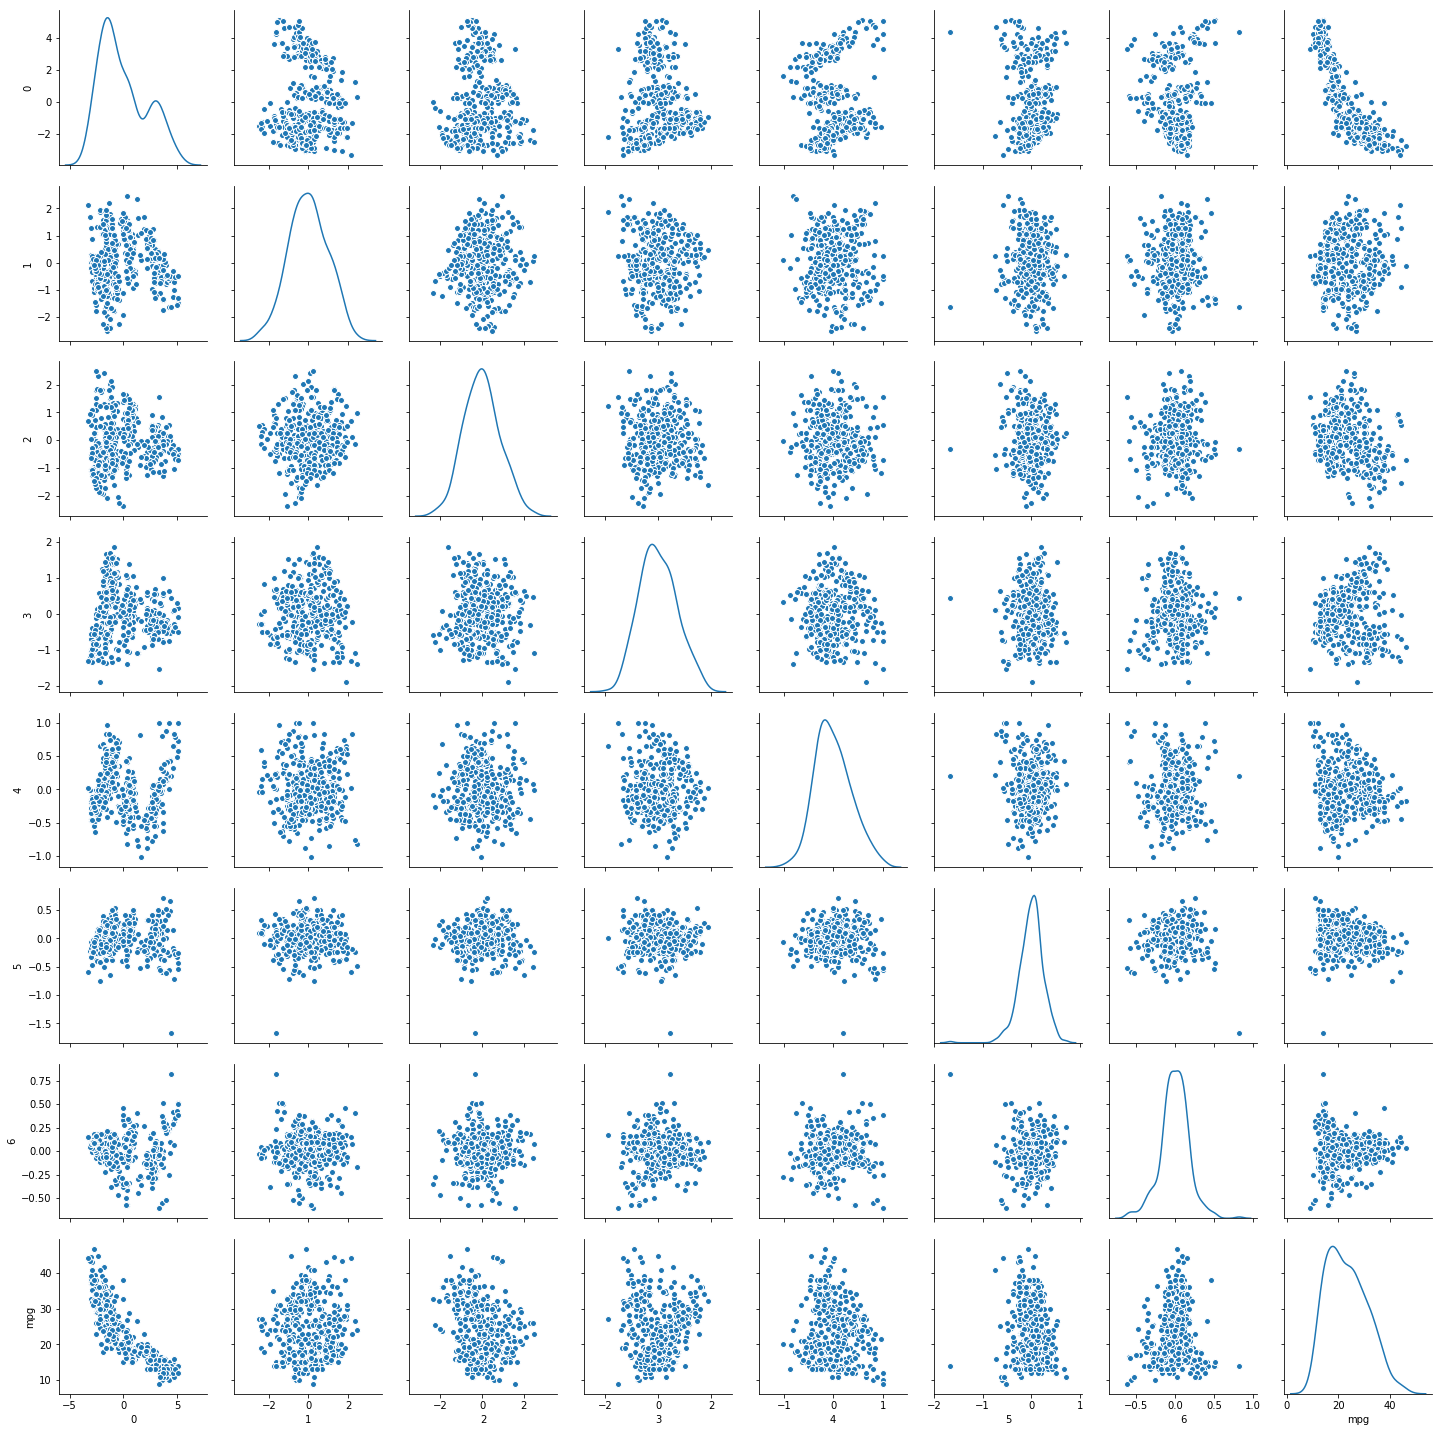

In [22]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [25]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-3.05537945,  0.11664724, -2.67415456,  0.99458422])

In [26]:
regression_model.intercept_

23.526127183763794

In [27]:
regression_model.score(X_test, y_test)

0.6952897001585875

In [16]:
# The model is performing poorly compared to the performance in original dimensions!

# Why do you think the peformance has gone down? Isn't PCA supposed to increase the predictive power?

In [20]:
# OBSERVATIONS -

# 1. There is a significant correlation between target (mpg) and first PCA (pc0)
# 2. Correlation between other PCA dimensions and mpg is very low 
# 3. What was clearly visible as separate gaussians in original dimension is not visible any more. This is due to the fact that
#    PCA dimesions are composite of the original dimensions

# Lessons -

# 1. Uses PCA only when the original dimensions have linear relations. The original dimensions had negative curvilinear relations
# 2. Remove outliers before doing PCA. We have significant outliers which are due to mix up of the gaussians in original dimension

# Suggestion -

# 1. Segment the original data based on observations using K Means clustering
# 2. Remove the outliers from the segments
# 2. If the original dimensions show strong linear relations in the segments, then apply PCA